In [55]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Loading Data

In [56]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

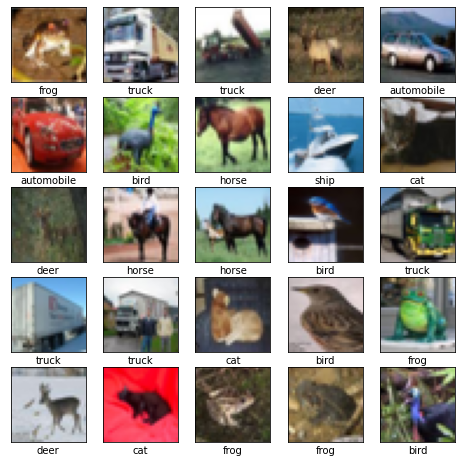

In [57]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    # The CIFAR labels happen to be arrays,
    #which is why we need the extra index
    plt.xlabel(classes[y_train[i][0]])
plt.show()

In [58]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [59]:
y_train=y_train.reshape(-1,)
y_train.shape

(50000,)

In [60]:
y_test = y_test.reshape(-1,)

In [61]:
def plot_sample(X,y,index):

  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

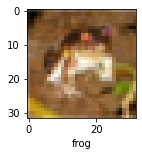

In [62]:
plot_sample(X_train,y_train,0)

In [ ]:
#X_train = X_train / 255.0
#X_test = X_test / 255.0

Creat the convolutional base

In [22]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

Adding Dense Layers on the top

In [24]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 1024)             

Evaluation

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
history = model.fit(X_train, y_train,batch_size = 128, epochs=10, validation_split=0.2, validation_data=(X_test, y_test))

Epoch 1/10
391/391 [==============================] - 63s 161ms/step - loss: 1.3798 - accuracy: 0.5026 - val_loss: 1.3022 - val_accuracy: 0.5330
Epoch 2/10
391/391 [==============================] - 63s 161ms/step - loss: 1.2116 - accuracy: 0.5694 - val_loss: 1.2255 - val_accuracy: 0.5634
Epoch 3/10
391/391 [==============================] - 63s 162ms/step - loss: 1.1096 - accuracy: 0.6090 - val_loss: 1.1230 - val_accuracy: 0.6020
Epoch 4/10
391/391 [==============================] - 64s 164ms/step - loss: 1.0165 - accuracy: 0.6416 - val_loss: 1.1034 - val_accuracy: 0.6200
Epoch 5/10
391/391 [==============================] - 65s 166ms/step - loss: 0.9386 - accuracy: 0.6705 - val_loss: 1.0536 - val_accuracy: 0.6393
Epoch 6/10
391/391 [==============================] - 63s 161ms/step - loss: 0.8722 - accuracy: 0.6942 - val_loss: 1.0473 - val_accuracy: 0.6485
Epoch 7/10
391/391 [==============================] - 63s 161ms/step - loss: 0.8016 - accuracy: 0.7195 - val_loss: 1.0838 - val_ac

313/313 - 5s - loss: 1.0300 - accuracy: 0.6773 - 5s/epoch - 15ms/step


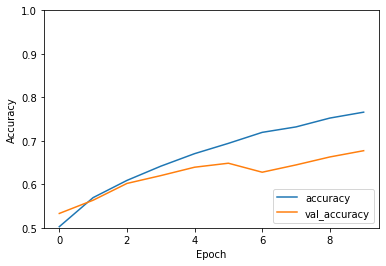

In [29]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,
                                     y_test,
                                     verbose=2)

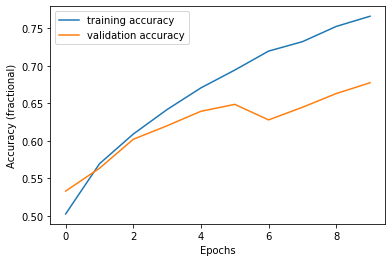

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy (fractional)')
plt.legend(['training accuracy', 'validation accuracy'], loc='best')

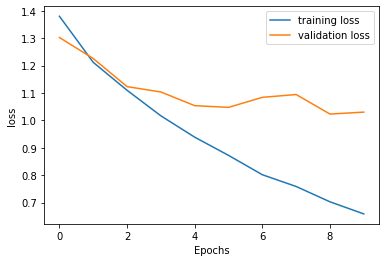

In [31]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['training loss', 'validation loss'], loc='best')

In [32]:
print('Test Accuracy is',test_acc)

Test Accuracy is 0.677299976348877


In [33]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 6s 17ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.73      0.72      1000
           1       0.81      0.79      0.80      1000
           2       0.60      0.56      0.58      1000
           3       0.51      0.46      0.48      1000
           4       0.65      0.57      0.61      1000
           5       0.52      0.68      0.59      1000
           6       0.78      0.74      0.76      1000
           7       0.70      0.72      0.71      1000
           8       0.78      0.77      0.77      1000
           9       0.76      0.76      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [34]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [35]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

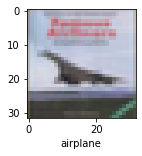

In [63]:
plot_sample(X_test, y_test, 3)